In [1]:
import pandas as pd

# Load the Parquet file
df = pd.read_parquet('./vantage_furniture_tutorial.parquet')


In [2]:
# Show the DataFrame columns
print(df.columns)


Index(['id', 'text', 'meta_category', 'meta_rating_bucket',
       'meta_numratings_bucket', 'noop_url', 'noop_rating', 'noop_numratings',
       'noop_image_url', 'noop_description', 'noop_title'],
      dtype='object')


In [3]:
# Print the first 10 rows of the DataFrame
print(df.head(10))


                                 id  \
0  c76532c4c9f16dfd0d5f4ff630a18e20   
1  545110c7c31fd107f9092c74d44e2aa1   
2  2c4a4b1d9c0738907cd4a94c3738bff7   
3  9e11e1bc4cc09ae548e870b3c67882d0   
4  cd20ee1e96cec7b1c4781538bc7ef625   
5  d5e148da43ad7067ffece057c7e76be7   
6  e3283bbf09340ce4ebba0c708bf66272   
7  3cf05415399409003ddb1b30a46f6346   
8  6e1415bd4159970b142258f08c128b7f   
9  fda41cd3f48d181a534533abd06a9f87   

                                                text  \
0  Console table made of old solid wood beams joi...   
1  Narrow Console Table, 9.8" Deep Entry Table ♥ ...   
2  glass coffee table Do not settle for less when...   
3  Linen fabric Floor seating sofa,Off white Beig...   
4  Coffee Table - South American Walnut, Live Edg...   
5  Behind the Couch Console Table Plans Instructi...   
6  End Table - South American Walnut, End Table, ...   
7  Coffee Table - South American Walnut, Live Edg...   
8  Reclaimed Wood Bar Table, Wood Bar Table, Buff...   
9  Console

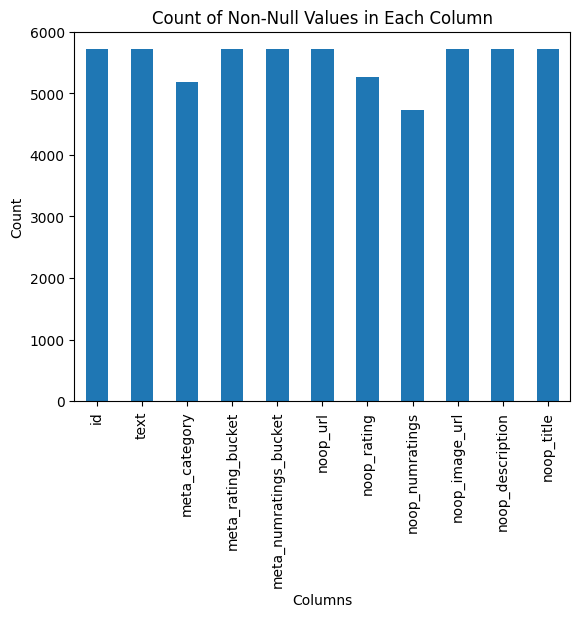

In [4]:
import matplotlib.pyplot as plt

# Plot the count of non-null values for each column
df.count().plot(kind='bar')
plt.title('Count of Non-Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()


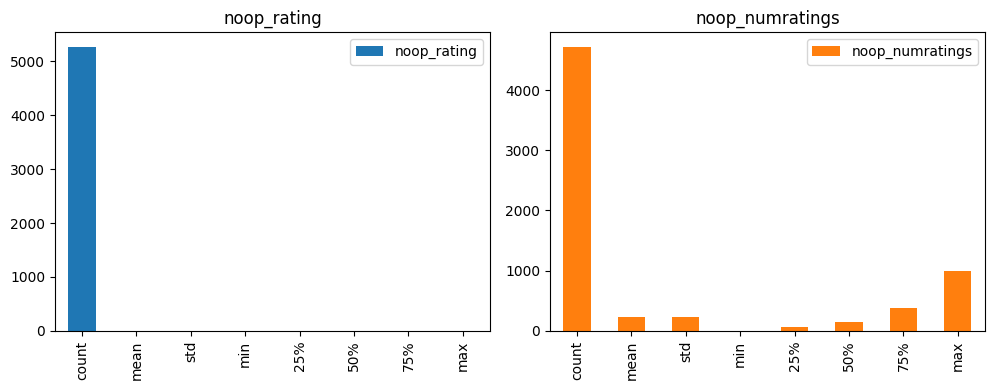

In [5]:
import numpy as np
import math

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)

# Calculate the layout size
cols_per_row = 3  # You can adjust this number
rows = math.ceil(num_cols / cols_per_row)

# Adjust the figsize based on the number of rows and columns
figsize_width = cols_per_row * 5
figsize_height = rows * 4

# Plot statistics for numeric columns
df[numeric_cols].describe().plot(kind='bar', subplots=True, layout=(rows, cols_per_row), figsize=(figsize_width, figsize_height))
plt.tight_layout()
plt.show()


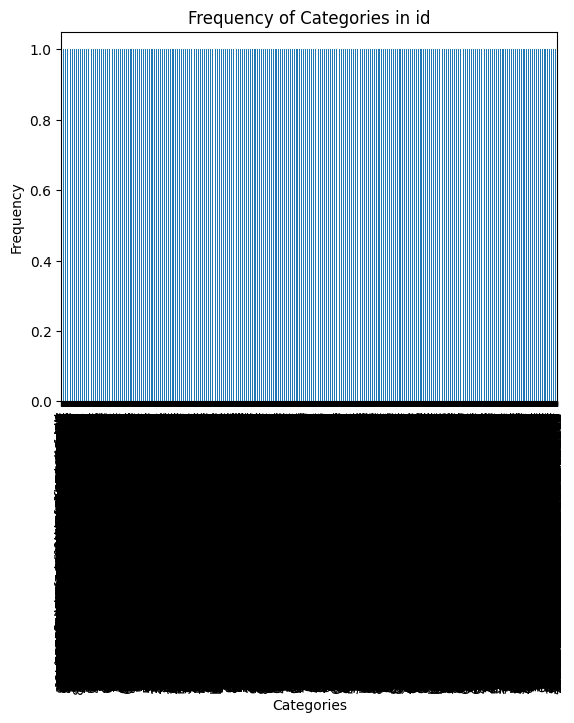

/Users/ngoodman/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10071 (\N{HEAVY EXCLAMATION MARK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ngoodman/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ngoodman/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ngoodman/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ngoodman/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128017 (\N{SHEEP}) missing from current font.
  f

ValueError: 
Ships FREE w/ 35 dollar Min. Farmhouse Shelf Bracket, Farmhouse Shelf Brackets, Corbel, Brackets are SOLD INDIVIDUALLY Cast Iron Bracket **** SOLD INDIVIDUALLY ****Price as follows for each bracket according to size.4"       $125.5"    $147"       $199.5"    $279.5"Each arm extends 9.5"Each arm is 1 1/8" wideWhere the arm flares out for the screws it is 2 1/8"7" x 7"Each arm extends 7"Each arm is a little over 7/8" wideEXCEPT where it flares out for the screws is 1 3/4"5.5"Each arm extends 5.5"Each arm is 5/8" wideWhere the arm flares out for the screws it is 1 3/8" wide4"Each arm extends 4"Each arm is 5/8" - 3/4" wide.Where the arm flares out for the screws it is 1 1/8" - 1 1/4" wideWe do not include screws as there are just too many variables for each persons project.What type of surface the product is being attached to requires different types of screws.How thick the surface is that the product is being attached to, etc....There can be a variance on the length up to 1/4" depending on how much grinding is required when it comes out of the mold. Ships FREE w/ 35 dollar Min. Farmhouse Shelf Bracket, Farmhouse Shelf Brackets, Corbel, Brackets are SOLD INDIVIDUALLY Materials: Cast Iron, Heavy Duty, Support, Corbel, Metal, Steel Home & Living Furniture Living Room Furniture Bookshelves
                                                                                                                                                                                                                                 ^
ParseException: Expected end of text, found '$'  (at char 225), (line:1, col:226)

<Figure size 640x480 with 1 Axes>

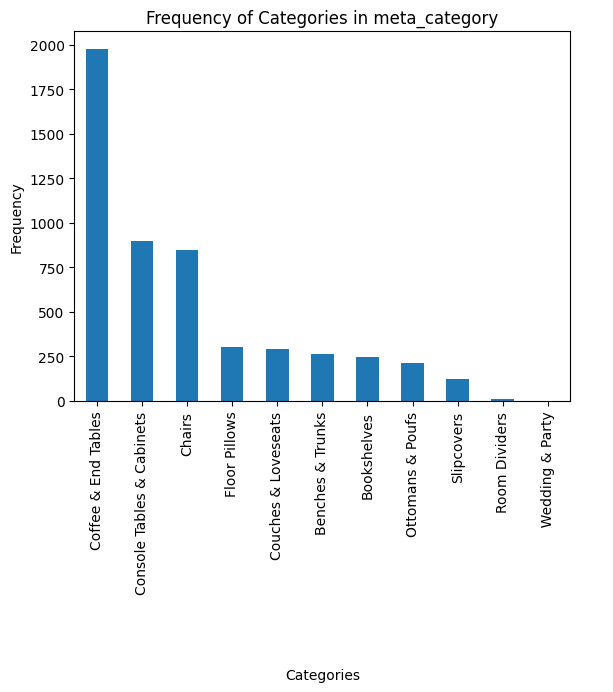

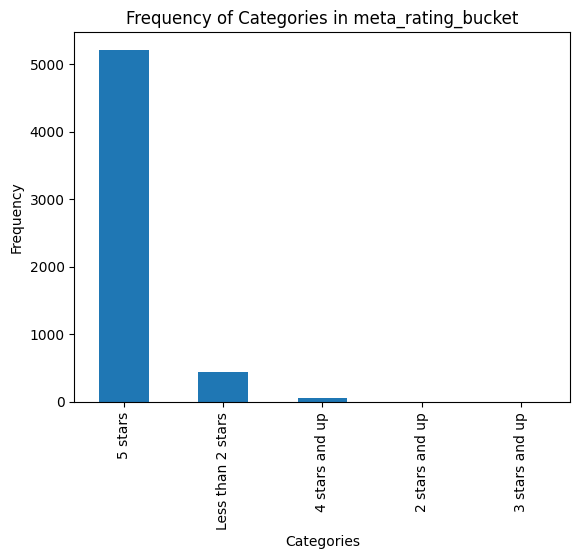

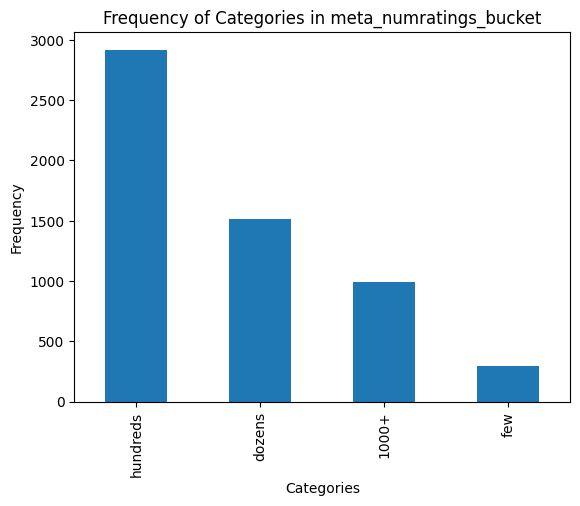

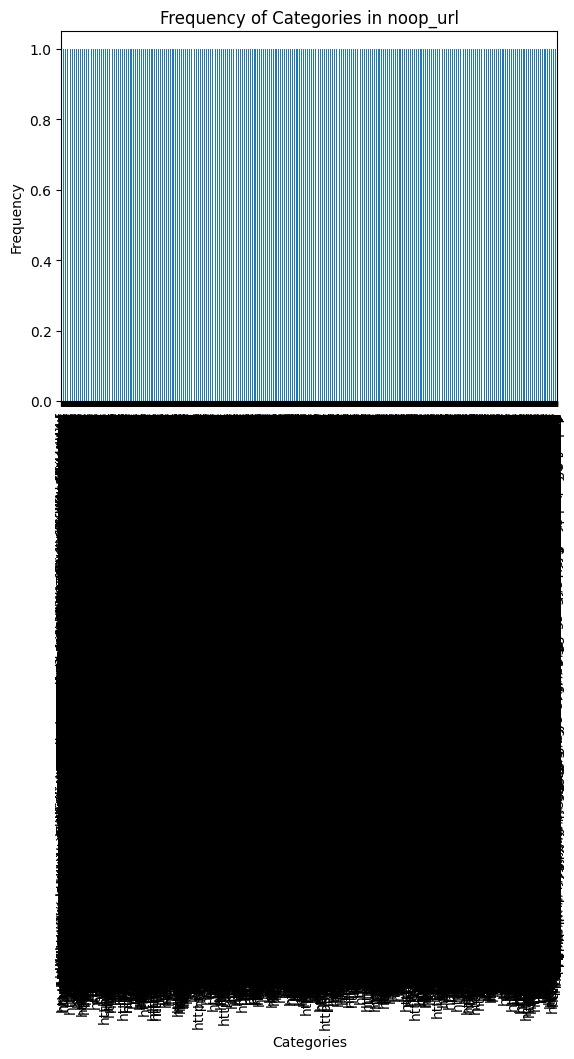

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot the frequency of categories for each categorical column
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
import pandas as pd
import hashlib
from urllib.parse import urlparse, unquote

# Function to create MD5 hash of a string
def create_md5_hash(string):
    return hashlib.md5(string.encode()).hexdigest()

# Function to transform URL slug into a title
def url_to_title(url):
    parsed_url = urlparse(url)
    title = parsed_url.path.split('/')[-1].replace('-', ' ')
    title = unquote(title)
    return title.title()

# Function to bucket ratings
def bucket_rating(rating):
    if rating == 5.0:
        return '5 stars'
    elif rating >= 4.0:
        return '4 stars and up'
    elif rating >= 3.0:
        return '3 stars and up'
    elif rating >= 2.0:
        return '2 stars and up'
    else:
        return 'Less than 2 stars'

# Function to bucket number of ratings
def bucket_numratings(numratings):
    if numratings == 0:
        return 'none'
    elif numratings < 10:
        return 'few'
    elif numratings < 100:
        return 'dozens'
    elif numratings < 1000:
        return 'hundreds'
    else:
        return '1000+'

# 1. Drop specified columns
df.drop(['meta_category_l1', 'meta_category_l2', 'meta_category_l3'], axis=1, inplace=True)

# 2. Rename 'meta_category_l4' to 'meta_category'
df.rename(columns={'meta_category_l4': 'meta_category'}, inplace=True)

# 3. Rename 'meta_rating' to 'noop_rating'
df.rename(columns={'meta_rating': 'noop_rating'}, inplace=True)

# 4. Create 'meta_rating_bucket' from 'noop_rating'
df['meta_rating_bucket'] = df['noop_rating'].apply(bucket_rating)

# 5. Rename 'meta_numratings' to 'noop_numratings'
df.rename(columns={'meta_numratings': 'noop_numratings'}, inplace=True)

# 6. Create 'meta_numratings_bucket' from 'noop_numratings'
df['meta_numratings_bucket'] = df['noop_numratings'].apply(bucket_numratings)

# Creating a new column 'noop_description' with the first 255 characters of the 'description' column
df['noop_description'] = df['text'].str.slice(0, 255)

# Display the modified DataFrame
df.head()
